# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [1]:
# Import the appropriate libraries with aliases
import numpy as np
import seaborn as sb
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
# Create two new dataframes
df_north = pd.read_csv('NorthCallCenter.csv')
df_north.head()


,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1


In [2]:
df_south = pd.read_csv('SouthCallCenter.csv')
df_south.head()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, answer the following questions. In the code blocks below enter the code used to solve the question.  At the end of the section record your answers by double clicking where asked.

EDA Question 1A:  How many reps are in the North branch?  
There are 9 reps in north branch

In [3]:
#Code Used:
north_reps = df_north["Rep ID"].nunique()
north_reps



9

EDA Question 1B:  How many reps are in the South branch?  
There are 11 reps in south branch

In [4]:
#Code Used:
south_reps = df_south["Rep ID"].nunique()
south_reps


11

EDA Question 2A:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the North branch? 
average busy minutes - 9.99
average not ready minutes - 1.91
average incoming wait time -3.05 
average during call wait - 2.97

In [5]:
#Code Used:
df_north.describe()



,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
count,245.000000,245.000000,245.000000,245.000000,245.000000,82.000000,245.000000,245.0
mean,122.000000,0.020408,0.028571,9.987755,1.914286,3.048780,2.967347,1.0
std,70.869599,0.141681,0.166940,1.403980,0.771416,1.456382,0.843827,0.0
min,0.000000,0.000000,0.000000,8.000000,1.000000,1.000000,2.000000,1.0
25%,61.000000,0.000000,0.000000,9.000000,1.000000,2.000000,2.000000,1.0
50%,122.000000,0.000000,0.000000,10.000000,2.000000,3.000000,3.000000,1.0
75%,183.000000,0.000000,0.000000,11.000000,3.000000,4.000000,4.000000,1.0
max,244.000000,1.000000,1.000000,12.000000,3.000000,5.000000,4.000000,1.0


EDA Question 2B:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the South branch? 
 average busy minutes - 10.05
average not ready minutes - 1.91
average incoming wait time -3.00 
average during call wait - 3.08

In [6]:
#Code Used:
df_south.describe()

,Unnamed: 0,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
count,314.000000,314.000000,314.000000,314.00000,314.000000,126.000000,314.000000,314.0
mean,156.500000,0.035032,0.012739,10.05414,1.910828,3.000000,3.076433,1.0
std,90.788215,0.184154,0.112324,1.40751,0.860016,1.308434,0.819424,0.0
min,0.000000,0.000000,0.000000,8.00000,1.000000,1.000000,2.000000,1.0
25%,78.250000,0.000000,0.000000,9.00000,1.000000,2.000000,2.000000,1.0
50%,156.500000,0.000000,0.000000,10.00000,2.000000,3.000000,3.000000,1.0
75%,234.750000,0.000000,0.000000,11.00000,3.000000,4.000000,4.000000,1.0
max,313.000000,1.000000,1.000000,12.00000,3.000000,5.000000,4.000000,1.0


#### EDA Question 3:  What is the number of calls taken for each time block(Both North and South combined)?

In [7]:
# Code Used:
total_calls = pd.concat([df_north,df_south])[["Time Block","Calls"]].groupby("Time Block").count()
total_calls

,Calls
Time Block,
10:00 AM,99
11:00 AM,56
12:00 PM,120
1:00 PM,40
2:00 PM,65
3:00 PM,73
4:00 PM,53
5:00 PM,43
9:00 AM,10


Record your answers for the EDA section by double clicking here:
- 1a) Reps in the North Branch = 9
- 1b) Reps in the South Branch = 11


- 2a) North Branch, (round to the nearest hundredth):
>-average busy minutes - 9.99
>-average not ready minutes - 1.91
>-average incoming wait time -3.05 
>-average during call wait - 2.97 
- 2b) South Branch, (round to the nearest hundredth):
>-average busy minutes - 10.05
>-average not ready minutes - 1.91
>-average incoming wait time -3.00 
>-average during call wait - 3.08
- 3) Total Calls taken for all branches per time block:
> - 9:00AM   = 99
> - 10:00AM  = 56
> - 11:00AM  = 120
> - 12:00PM  = 40
> - 1:00PM   = 65
> - 2:00PM   = 73
> - 3:00PM   = 53
> - 4:00PM   = 43
> - 5:00PM   = 10



<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

Cleaning Your Data 
Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. 

In [8]:
# Code Used
# Add Additional Cells as needed.
df_north.isna().sum()

Unnamed: 0                 0
Branch                     0
Call Purpose               0
Time Block                 0
Incoming or Outgoing       0
Queue                      0
Rep ID                     0
Sale                       0
Lost Call                  0
Abandoned                  0
Busy Minutes               0
Not Ready Minutes          0
Incoming Wait Time       163
During Call Wait Time      0
Calls                      0
dtype: int64

In [9]:
df_south.isna().sum()

Unnamed: 0                 0
Branch                     0
Call Purpose               0
Time Block                 0
Incoming or Outgoing       0
Queue                      0
Rep ID                     0
Sale                       0
Lost Call                  0
Abandoned                  0
Busy Minutes               0
Not Ready Minutes          0
Incoming Wait Time       188
During Call Wait Time      0
Calls                      0
dtype: int64

In [10]:
df_north[['Incoming or Outgoing','Incoming Wait Time']].groupby('Incoming or Outgoing').mean()

,Incoming Wait Time
Incoming or Outgoing,
Incoming,3.04878
Outgoing,NaN


In [11]:
df_south[['Incoming or Outgoing','Incoming Wait Time']].groupby('Incoming or Outgoing').mean()

,Incoming Wait Time
Incoming or Outgoing,
Incoming,3.0
Outgoing,NaN


In [12]:
#df_north['Incoming Wait Time'] = df_north['Incoming Wait Time'].fillna('_MISSING_')
#df_south['Incoming Wait Time'] = df_south['Incoming Wait Time'].fillna('_MISSING_')
#df_north
#df_south

Cleaning Question 2:  In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
Record your answer by double clicking here:
> Your Answer:There is two separate 'YES' values in "Sale" column. This has occured due to white space after the word 'YES '.So, I replaced both the 'YES' with 'Yes' for clarity and uniformity.

In [13]:
#Code Used
# Add Additional Cells as needed.
df_north['Sale'].unique()


array(['NO', 'YES ', 'YES'], dtype=object)

In [14]:
df_north['Sale'].value_counts()

NO      234
YES      10
YES       1
Name: Sale, dtype: int64

In [15]:
df_north = df_north.replace({'Sale':{'NO':'No','YES ':'Yes','YES':'Yes'}})
df_north
df_north['Sale'].value_counts()

No     234
Yes     11
Name: Sale, dtype: int64

Cleaning Question 3:  Are there duplicates in the two data sets? If there are, how did you handle them?
Record your answer by double clicking here:
> Your Answer: There are no duplicates in both north and south branches

In [16]:
#Code Used
# Add Additional Cells as needed.
df_north.shape

(245, 15)

In [17]:
df_south.shape

(314, 15)

In [18]:
df_north_duplicates = df_north[df_north.duplicated()].sum()
df_north_duplicates

Unnamed: 0               0.0
Branch                   0.0
Call Purpose             0.0
Time Block               0.0
Incoming or Outgoing     0.0
Queue                    0.0
Rep ID                   0.0
Sale                     0.0
Lost Call                0.0
Abandoned                0.0
Busy Minutes             0.0
Not Ready Minutes        0.0
Incoming Wait Time       0.0
During Call Wait Time    0.0
Calls                    0.0
dtype: float64

In [19]:
df_south_duplicates = df_south[df_south.duplicated()].sum()
df_south_duplicates

Unnamed: 0               0.0
Branch                   0.0
Call Purpose             0.0
Time Block               0.0
Incoming or Outgoing     0.0
Queue                    0.0
Rep ID                   0.0
Sale                     0.0
Lost Call                0.0
Abandoned                0.0
Busy Minutes             0.0
Not Ready Minutes        0.0
Incoming Wait Time       0.0
During Call Wait Time    0.0
Calls                    0.0
dtype: float64

Cleaning Question 4:  Is any of the data in the two data sets unnecessary? If yes, how did you handle it?
Record your answer by double clicking here:
> Your Answer:Based on the business issue( Hiring five additional reps to enhance customer experience. In order to do so,we need to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance) ,I feel following columns i.e ('Unnamed: 0','Time Block','Lost Call','During Call Wait Time')are not required for the analysis.So,I used drop function to delete unnecessary columns.

In [20]:
#Code Used
# Add Additional Cells as needed.
df_north.head()
df_north_new = df_north.drop(['Unnamed: 0','Time Block','Lost Call','During Call Wait Time'],axis = 1)
df_north_new.head()

,Branch,Call Purpose,Incoming or Outgoing,Queue,Rep ID,Sale,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,Calls
0,North,Complaint,Incoming,B,Brent,No,1,9,2,1.0,1
1,North,Sales Support,Incoming,A,Cam,No,0,11,1,1.0,1
2,North,Sales Support,Incoming,B,Todd,No,0,9,3,1.0,1
3,North,Sales Support,Incoming,B,Brent,No,0,11,2,1.0,1
4,North,Product Support,Incoming,B,Brent,No,0,8,2,1.0,1


In [21]:
df_south.head()
df_south_new = df_south.drop(['Unnamed: 0','Time Block','Lost Call','During Call Wait Time'],axis = 1)
df_south_new.head()

,Branch,Call Purpose,Incoming or Outgoing,Queue,Rep ID,Sale,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,Calls
0,South,Sales Support,Incoming,D,Kate,NO,0,9,1,1.0,1
1,South,Sales Support,Incoming,C,Eric,NO,0,8,2,1.0,1
2,South,Sales Support,Incoming,C,Susan,NO,0,10,2,1.0,1
3,South,Sales Support,Incoming,C,Alice,NO,0,12,1,1.0,1
4,South,Sales Support,Incoming,C,Sandy,NO,0,8,3,1.0,1


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Data Manipulation
Before you begin answering any questions, combine the two datasets together to create a third dataframe called df. You can use this third dataframe to compare the two call centers to company-wide trends.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. Record your answer by double clicking the below cell.

In [22]:
# Create dataframe for the entire company named df

df = pd.concat([df_north_new,df_south_new])
df.head()
df.tail()

,Branch,Call Purpose,Incoming or Outgoing,Queue,Rep ID,Sale,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,Calls
309,South,Product Support,Outgoing,D,Helga,NO,0,10,3,NaN,1
310,South,Product Support,Outgoing,C,Susan,NO,0,12,3,NaN,1
311,South,Product Support,Outgoing,C,Sandy,NO,0,9,3,NaN,1
312,South,Product Support,Outgoing,C,Eric,NO,0,10,1,NaN,1
313,South,Product Support,Outgoing,D,George,NO,0,10,2,NaN,1


#### Manipulation Question 1:  Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.
##### Record your answer by double clicking here:
Rep with the hightest number of calls and their total calls:
- North Branch = Rep with highest no.of calls-Brent,Total calls-37
- South Branch = Rep with highest no.of calls-Eric,Total calls-35


In [23]:
# Code Used
# Add Additional Cells as needed.
rep_calls = df.groupby(['Rep ID','Branch']).sum().sort_values(by = ['Branch','Calls'],ascending=False)
rep_calls

C:\Users\chakr\AppData\Local\Temp\ipykernel_11456\1182164287.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  rep_calls = df.groupby(['Rep ID','Branch']).sum().sort_values(by = ['Branch','Calls'],ascending=False)


,,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,Calls
Rep ID,Branch,,,,,
Eric,South,0,361,54,47.0,35
Randy,South,1,320,66,47.0,33
Sandy,South,0,325,60,34.0,32
Helga,South,2,292,58,36.0,31
George,South,0,298,53,41.0,29
Kate,South,0,291,61,37.0,29
Karl,South,0,287,61,26.0,28
Josh,South,0,260,50,31.0,26
Susan,South,0,267,53,35.0,26


#### Manipulation Question 2:  The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
##### Record your answer by double clicking here:
Average Call Abandonment Rates (round to the nearest hundredth):
- North Branch = 2.86%
- South Branch = 1.27%
- Company Wide =1.97%
- Do any of these fall out of the optimal range of 2-5%?Yes,South branch falls out of optimal range

In [24]:
# Code Used
# Add Additional Cells as needed.
avg_abandonment_rate_nb = df_north_new['Abandoned'].mean()*100
avg_abandonment_rate_nb

2.857142857142857

In [25]:
avg_abandonment_rate_sb = df_south_new['Abandoned'].mean()*100
avg_abandonment_rate_sb

1.2738853503184715

In [26]:
avg_abandonment_rate_co = df['Abandoned'].mean()*100
avg_abandonment_rate_co 

1.9677996422182469

#### Manipulation Question 3:  Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?
##### Record your answer by double clicking here:
Percentage of calls answered within 2 seconds, include # of calls:
- North Branch = 40.24%
- South Branch = 38.09%
- Company Wide = 38.94%

In [27]:
# Code Used
# Add Additional Cells as needed.
tot_inc_wait_time_nb = (df_north_new['Incoming Wait Time'] <= 2).sum()
tot_inc_wait_time_nb
tot_inc_call_nb = (df_north_new['Incoming or Outgoing'] == 'Incoming').sum()
tot_inc_call_nb
total_calls__nb =(tot_inc_wait_time_nb/tot_inc_call_nb)*100
total_calls__nb

40.243902439024396

In [28]:
tot_inc_wait_time_sb = (df_south_new['Incoming Wait Time'] <= 2).sum()
tot_inc_wait_time_sb
tot_inc_call_sb = (df_south_new['Incoming or Outgoing'] == 'Incoming').sum()
tot_inc_call_sb 
total_calls_sb =(tot_inc_wait_time_sb/tot_inc_call_sb)*100
total_calls_sb

38.095238095238095

In [29]:
tot_inc_wait_time_co = (df['Incoming Wait Time'] <= 2).sum()
tot_inc_wait_time_co
tot_inc_call_co = (df['Incoming or Outgoing'] == 'Incoming').sum()
tot_inc_call_co
calls_co =(tot_inc_wait_time_co/tot_inc_call_co )*100
calls_co

38.94230769230769

#### Manipulation Question 4: For each branch and the entire company, what is the average speed of answer?
##### Record your answer by double clicking here:
Average speed of answer (rounded to nearest hundredth):
- North Branch in seconds = 3.05 seconds
- South Branch in seconds = 3.0 seconds
- Company Wide in seconds = 3.02 seconds


In [30]:
# Code Used 
avg_speed_co_nb = df_north_new['Incoming Wait Time'].agg('mean')
avg_speed_co_nb 

3.048780487804878

In [31]:
avg_speed_co_sb = df_south_new['Incoming Wait Time'].agg('mean')
avg_speed_co_sb

3.0

In [32]:
avg_speed_co = df['Incoming Wait Time'].agg('mean')
avg_speed_co 

3.019230769230769

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why. 

*NOTE Some questions you may decide to use more than one chart and or chart style.

#### Visualization 1:  What is the average abandonment rate per queue?
##### Record your answer by double clicking here:

> Chart style you chose and why: I chose bar chart because it is useful in comparing data between different groups.The below given bar graph clearly shows the average abondonment rate for each queue.

C:\Users\chakr\AppData\Local\Temp\ipykernel_11456\1391591036.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  queue_dict = df.groupby("Queue").agg("sum")


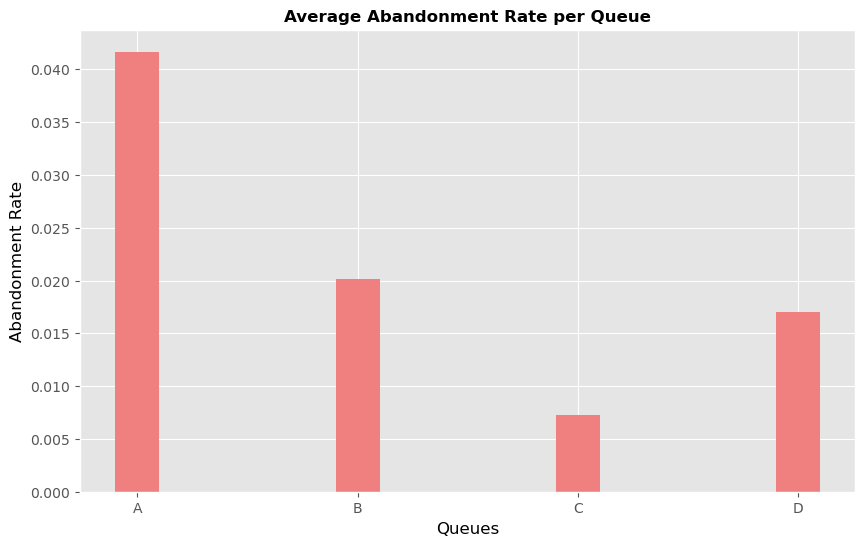

In [33]:
# Create visualization 1 here
# Import any additional libraries needed with alias



# The dictionary abandonment_rates has the data you need.
abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] 

#Your Code Here:

abandonment_rates
queues
queue_dict

x=abandonment_rates.keys()
y=abandonment_rates.values()

plt.figure(figsize=(10,6))
plt.bar(x, y,width=0.2, color='lightcoral')

plt.xlabel('Queues', color = 'black', fontsize = 12)
plt.ylabel('Abandonment Rate', color = 'black', fontsize = 12)
plt.title('Average Abandonment Rate per Queue', color = 'black', fontsize = 12, fontweight = 'bold')
plt.savefig('abandonedbar_north.png')
plt.show()


#### Visualization 2: What is the service level percentage and average speed of answer for each rep in the North Branch?
##### Record your answer by double clicking here:

> Chart style you chose and why:I used scatter plot because it helps to understand whether or not two variables have a relationship or correlation.In the scatter plot given below, we can precisely observe the relationship between 'Incoming Wait Time' and 'Service Level' for each rep in north branch.

In [34]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep

north_plt = df_north_new.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = df_north_new[df_north_new["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = df_north_new[df_north_new["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100

#Your Code Here:
final_reps_n = pd.merge(north_plt,service_level,on="Rep ID")
final_reps_n = final_reps_n.drop(['Calls_x','Calls_y'],axis = 1)
final_reps_n


,Rep ID,Incoming Wait Time,Service Level %
0,Amanda,2.400000,60.000000
1,Andy,3.600000,30.000000
2,Brent,2.125000,75.000000
3,Cam,2.909091,45.454545
4,Duke,2.785714,42.857143
5,Joe,3.600000,20.000000
6,Lilly,3.083333,33.333333
7,Todd,3.500000,33.333333
8,Xander,3.333333,33.333333


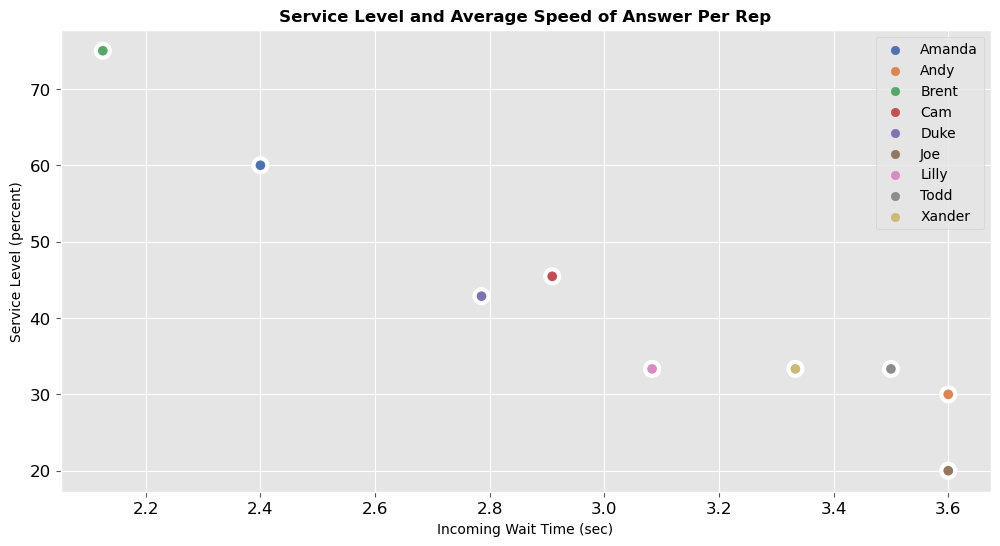

In [35]:
plt.figure(figsize=(12, 6))
sb.scatterplot(data = final_reps_n, x = 'Incoming Wait Time', y = 'Service Level %', s = 100, hue = 'Rep ID', linewidth = 3, palette = 'deep')
plt.title('Service Level and Average Speed of Answer Per Rep', color = 'black', fontsize = 12, fontweight = 'bold')
plt.xlabel('Incoming Wait Time (sec)', color = 'black', fontsize = 10)
plt.ylabel('Service Level (percent)', color = 'black', fontsize = 10)
plt.legend(fontsize = 10)
plt.xticks(color = 'black', fontsize = 12)
plt.yticks(color = 'black', fontsize = 12)
plt.savefig('scatter_north.png')

plt.show()



In [36]:
south_plt = df_south_new.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = df_south_new[df_south_new["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = df_south_new[df_south_new["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100
final_reps_s = pd.merge(south_plt,service_level,on="Rep ID")
final_reps_s = final_reps_s.drop(['Calls_x','Calls_y'],axis = 1)
final_reps_s

,Rep ID,Incoming Wait Time,Service Level %
0,Alice,2.500000,50.000000
1,Eric,2.611111,55.555556
2,George,3.153846,30.769231
3,Helga,3.272727,27.272727
4,Josh,3.444444,22.222222
5,Karl,2.888889,33.333333
6,Kate,3.363636,27.272727
7,Randy,2.937500,43.750000
8,Sandy,2.615385,53.846154
9,Sharon,3.625000,12.500000


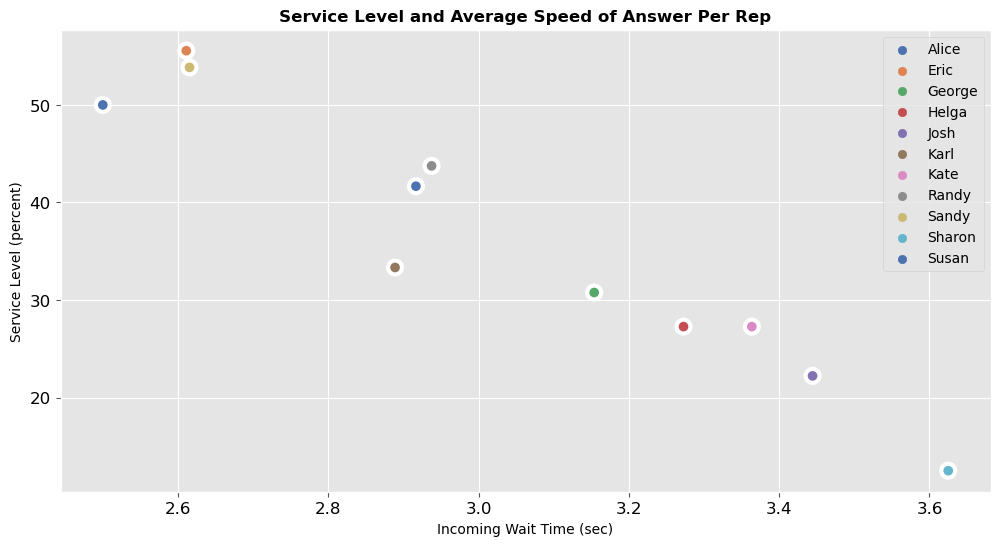

In [37]:
plt.figure(figsize=(12, 6))
sb.scatterplot(data = final_reps_s, x = 'Incoming Wait Time', y = 'Service Level %', s = 100, hue = 'Rep ID', linewidth = 3, palette = 'deep')
plt.title('Service Level and Average Speed of Answer Per Rep', color = 'black', fontsize = 12, fontweight = 'bold')
plt.xlabel('Incoming Wait Time (sec)', color = 'black', fontsize = 10)
plt.ylabel('Service Level (percent)', color = 'black', fontsize = 10)
plt.legend(fontsize = 10)
plt.xticks(color = 'black', fontsize = 12)
plt.yticks(color = 'black', fontsize = 12)
plt.savefig('scatter_south.png')

plt.show()


#### Visualization 3: For each type of call purpose, how many calls are outgoing vs. incoming?
##### Record your answer by double clicking here:
Chart style you chose and why: I have choosen the grouped bar chart to get a clear glimpse of how many incoming and outgoing call are made for purposes like complaints,sales support and product support.We clearly understand complaints are only incoming.



Call Purpose     Incoming or Outgoing
Complaint        Incoming                 51
Product Support  Outgoing                228
                 Incoming                 82
Sales Support    Outgoing                123
                 Incoming                 75
Name: Incoming or Outgoing, dtype: int64
{'Complaints': [51, 0], 'Sales Support': [75, 123], 'Product Support': [82, 228]}


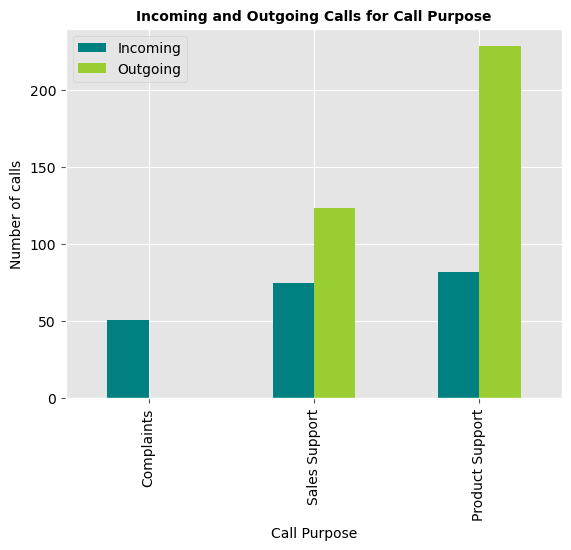

In [38]:
# Create visualization 3 here:
# The three dictionaries, complaints, sales_support, and product_support, have the information you need

purpose_group = df.groupby("Call Purpose")
call_purpose = ["Complaint", "Product Support", "Sales Support"]
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
print(purpose_counts)

complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()

call_support={
    "Complaints": [51, 0],
    "Sales Support": [75, 123],
    "Product Support": [82, 228]
}
print(call_support)

#Your Code Here:
d=pd.DataFrame(call_support).T
d.plot(kind='bar', color=['teal', 'yellowgreen'])
plt.xlabel('Call Purpose', color = 'black', fontsize = 10)
plt.ylabel('Number of calls', color = 'black', fontsize = 10)
plt.title('Incoming and Outgoing Calls for Call Purpose', color = 'black', fontsize = 10, fontweight = 'bold')
plt.legend(['Incoming', 'Outgoing'], loc = 'upper left', prop={'size': 10}, fontsize = 10)
plt.xticks(color = 'black',fontsize=10)
plt.yticks(color = 'black',fontsize=10)
plt.savefig('Complaintsandsupport grouped bar.png')
plt.show()


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.


#### Summary Question 1:  Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

##### Record your answer by double clicking here:
> Your Answer:Based on below given KPI's,In my opinion, south branch is operating more efficiently because there call abandonment rate(which is a key factor) is better than north branch.However,with additional reps,I think north branch will improve its average abondonment rates because other factors are almost same for both branches.

			 1.Average Call Abandonment Rates:
                    North Branch = 2.86%
                    South Branch = 1.27%
	
	         2.Service level/Percentage of calls answered within 2 seconds:
                    North Branch = 40.24
                    South Branch = 38.09
	
	         3.Average speed of answer:
                   North Branch in seconds = 3.05 seconds
                   South Branch in seconds = 3.0 seconds
             
	         4.Total number of reps:
			        Reps in the North Branch = 9
                    Reps in the South Branch = 11

  


#### Summary Question 2: Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

##### Record your answer by double clicking here:
> Your Answer: Based on number of reps in each branch,I think north branch would benefit from extra help.Average speed of answer is almost same for both branches.
              1.Total number of reps:
			        Reps in the North Branch = 9
                    Reps in the South Branch = 11
              2.Average speed of answer:
                   North Branch in seconds = 3.05 seconds
                   South Branch in seconds = 3.0 seconds



#### Summary Question 3: Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

##### Record your answer by double clicking here:
> Your Answer: Repeat call rate,average handle time and customer ratings/reviews will be usefull information for further analysis.


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Bonus Mission
Create a visualization that answers this question: For each call purpose, how many calls (incoming and outgoing) take place in each time block?
##### Record your answer by double clicking here:

> Chart style you chose and why: 

In [39]:
# Create your Bonus Mission visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Use groupby to plot based on time blocks:

# Use groupby and get_group to select which call purpose to plot:

KeyError: "['Time Block'] not in index"